In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats

In [2]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 120

In [3]:
# path = "Data_ccr/par_set_2_psd/trun2_2/" ## -------> Nskip = 4
# path = "Data_ccr/par_set_1_psd/trun3/"
path = "../mc2/Test_Data/trun5_1/"
Alldata = np.loadtxt(path + "delta_f2py_test.dat")
print(np.shape(Alldata))
nn = np.size(Alldata,0)
print(nn)
# nn = nn//2
# Vt_up = Alldata[0:nn,0]
T_up = Alldata[0:nn,0]
# Es_up = Alldata[:,9]
# Js_up = Alldata[:,10]
R_up = Alldata[0:nn,7]

print(T_up)


Tcrit = 1.32
# k1 = int(np.argwhere((T_up*10.) == 3.2))
# k2 = int(np.argwhere((T_up*10.) == 10.0))
# k3 = int(np.argwhere((T_up*10.) == 12.0))
# k4 = int(np.argwhere((T_up*10.) == 12.8))
# k5 = int(np.argwhere((T_up*10.) == 15.2))
# # k1 = int(np.argwhere((T_up*10.) == 3.3))
# # k2 = int(np.argwhere((T_up*10.) == 9.0))
# # k3 = int(np.argwhere((T_up*10.) == 12.0))
# # k4 = int(np.argwhere((T_up*10.) == 12.9))
# # k5 = int(np.argwhere((T_up*10.) == 15.0))
# print(k1,k2,k3,k4,k5)
# karr = np.array([k1,k2,k3,k4,k5])



# Tcrit = 0.56
# k1 = int(np.argwhere((T_up*10.) == 2.0))
# # k1 = int(np.argwhere((T_up*10.) == 2.4))
# k2 = int(np.argwhere((T_up*10.) == 4.0))
# k3 = int(np.argwhere((T_up*10.) == 5.0))
# k4 = int(np.argwhere((T_up*10.) == 5.5))
# k5 = int(np.argwhere((T_up*10.) == 8.0))
# print(k1,k2,k3,k4,k5)
# karr = np.array([k1,k2,k3,k4,k5])



# nn = 36

(50, 11)
50
[0.04 0.08 0.12 0.16 0.2  0.24 0.28 0.32 0.36 0.4  0.44 0.48 0.52 0.56
 0.6  0.64 0.68 0.72 0.76 0.8  0.84 0.88 0.92 0.96 1.   1.04 1.08 1.12
 1.16 1.2  1.24 1.28 1.32 1.36 1.4  1.44 1.48 1.52 1.56 1.6  1.64 1.68
 1.72 1.76 1.8  1.84 1.88 1.92 1.96 2.  ]


In [4]:
inputs = open(path+"input_par.dat", "r")

print(inputs.read())


{'g6': 0.5, 'g4': -1.0, 'g2': 1.0, 'coef': 0.1, 'nskip': 1, 'tloop': True, 'dphi': 0.2, 'Tc': 1.0, 'mfphi': False, 'r0': 3.5, 'Rload': 1.0, 'nwarm': 500000, 'my': 64, 'mx': 64, 'gamma': 0.1}{'Tbath': 0.4, 'seed': 8588523, 'maxE': 20.4, 'nmeas': 16384, 'dTb': 0.04, 'dE': 0.4, 'minT': 0.04, 'Tcrit': 1.32, 'maxT': 2.04, 'minE': 0.4}


(50, 4, 16384) (50, 4, 513) (50, 513) (50, 16384)


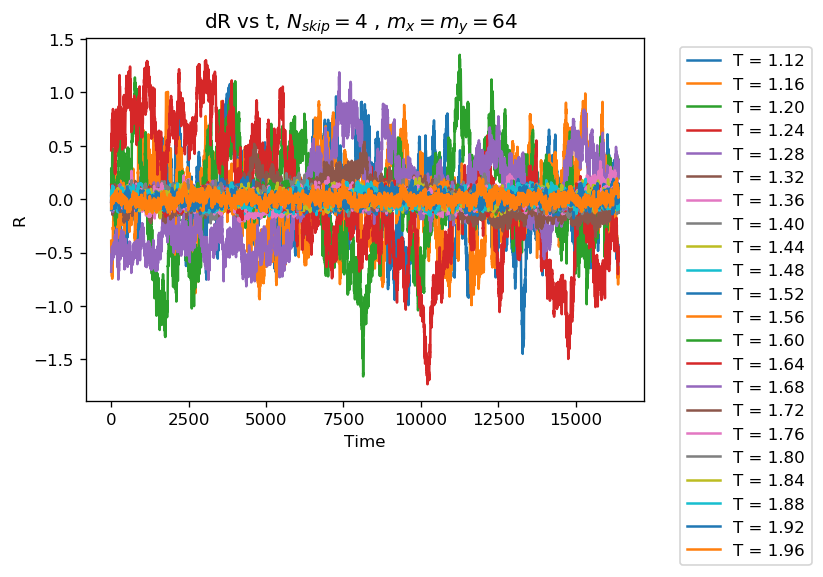

In [5]:
# NP = 1
# NP = 2
NP = 4
# NP = 8
# NP = 12
# NP = 16
# nP = 16

# nmeas = 32768
nmeas = 16384
# nmeas = 8192
# nmeas = 4096
# nmeas = 2048
# nmeas = 1024

kk = 0

Tdata = []
PSD2 = []
Omega = []
dRdata = []
fs = 1000.

beta = 10.0
window_length = 1024
# window_length = 256
numoverlap = window_length/2.
# numoverlap = 880
kaiserw = signal.get_window(('kaiser', beta), window_length) # Kaiser window
# boxcarw = signal.boxcar(window_length)

for i in range(nn):
    tdata = np.loadtxt(path + "t_data_" + str(i) + ".dat")
    tdata = tdata.reshape((NP,nmeas))
#     tdata = tdata.reshape((nP,nmeas))
#     NP = nP//4
#     tdata = tdata[0:NP,:]    
    R0 = np.mean(tdata,axis=1)
    R0 = R0.reshape((NP,1))
    R0 = np.dot(R0,np.ones((1,nmeas)))
#     print(np.shape(R0))
    delR = tdata - R0
#     fval, R_ps = np.absolute(signal.welch((delR/R0), fs))
    fval, R_ps = np.absolute(signal.welch((delR/R0), fs, nperseg = window_length, window=kaiserw, noverlap = numoverlap, scaling = 'spectrum')) ## PSD using welch method
#     fval, R_ps = np.absolute(signal.welch((delR/R0), fs, nperseg = window_length, window=boxcarw, noverlap = numoverlap)) ## PSD using welch method
    Tdata.append(tdata)
    dRdata.append(delR[kk,:]/R0[kk,:])
    PSD2.append(R_ps)
    Omega.append(fval)
#     plt.plot(delR[kk,:]/R0[kk,:] , label = "Vt = " + format(T_up[i], '.2f') )
    if T_up[i] > 1.1 and T_up[i] < 2.:
#         plt.plot(tdata[kk,:], label = "T = " + format(T_up[i], '.2f') )
        plt.plot(delR[kk,:] , label = "T = " + format(T_up[i], '.2f') )


    
Tdata = np.array(Tdata)
PSD2 = np.array(PSD2)
Omega = np.array(Omega)
dRdata = np.array(dRdata)
print(np.shape(Tdata) , np.shape(PSD2) , np.shape(Omega) ,np.shape(dRdata))
plt.xlabel("Time")
# plt.ylabel(r'$\frac{\Delta R}{\langle R \rangle}$', fontsize = 16)
plt.ylabel("R")
# # plt.ylim(0,10)
# plt.xlim(1000,1500)
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("dR vs t, $N_{skip} = 4$ , $m_x = m_y = 64$  ")
# plt.savefig(path+"dRvt.pdf",bbox_inches='tight')
plt.show()

(50, 4, 513) (50, 513)


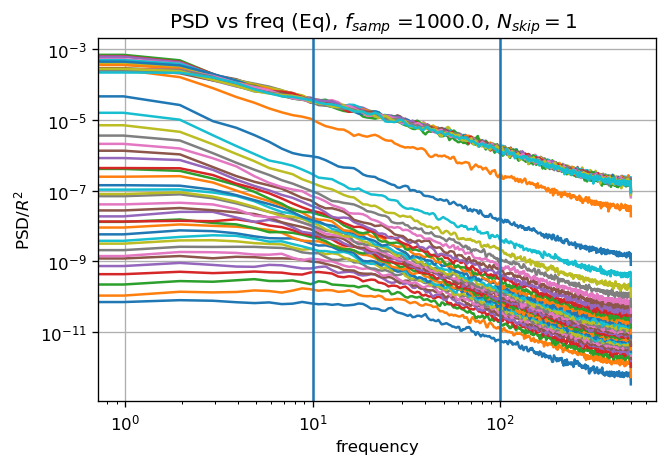

In [6]:
# print(Omega[0,:])
PSD_av = np.mean(PSD2,axis=1)
print(np.shape(PSD2) , np.shape(PSD_av))
upper = 100.
lower = 10.
for i in range(nn):
    PSD_av[i,:] = PSD_av[i,:]/Alldata[i,7]**2  ## Normalized PSD

for i in range(nn):
    plt.loglog(Omega[i,:], PSD_av[i,:])

PSD_snap = PSD_av[:,Omega[0,:] == 85.9375] 
plt.title("PSD vs freq (Eq), $f_{samp}$ ="+ format(fs, '.1f') + ", $N_{skip} = 1$  ")
plt.ylabel("PSD/$R^2$")
plt.xlabel("frequency")
# plt.xlim(1,1000)
# plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axvline(x=lower)
plt.axvline(x=upper)
# plt.ylim(1.0E-13,1.0E-2)

plt.grid(b=True,which='major', axis='both')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.savefig(path+"PSDvf_ns1.pdf")
plt.show()

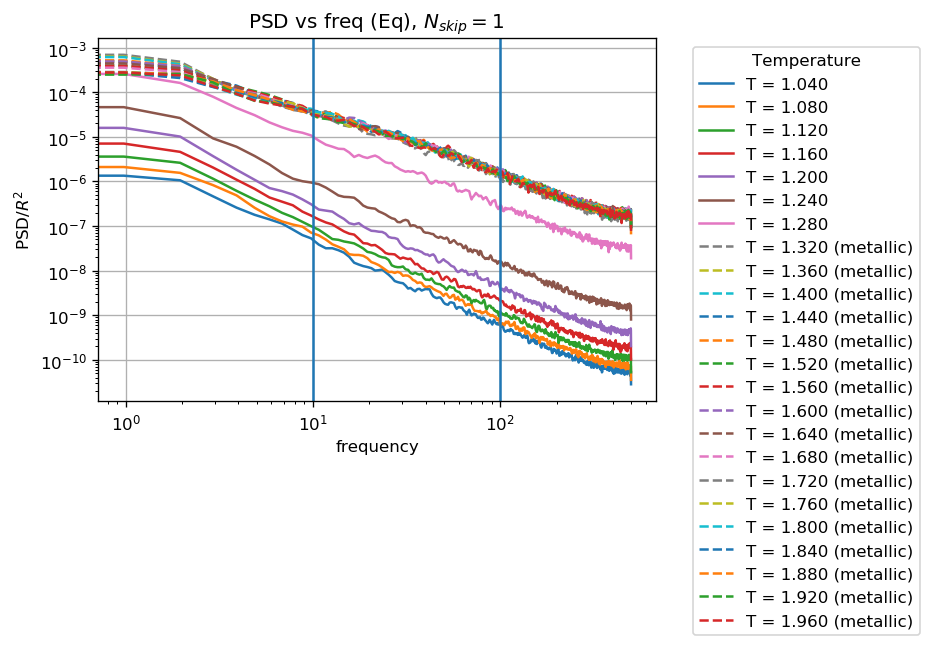

In [7]:
for i in range(nn):
    if T_up[i] > 1.0 and T_up[i] < Tcrit:
        plt.loglog(Omega[i,:], PSD_av[i,:], label = "T = " + format(T_up[i], '.3f'))#,linestyle='dashed' )
#         None
    elif T_up[i] >= Tcrit and T_up[i] < 2.:    
        plt.loglog(Omega[i,:], PSD_av[i,:], label = "T = " + format(T_up[i], '.3f') + " (metallic)",linestyle='dashed' )    
    else :
        None


# PSD_snap = PSD_av[:,Omega[0,:] == 100.5859375] 
plt.title("PSD vs freq (Eq), $N_{skip} = 1$ ")
plt.ylabel("PSD/$R^2$")
plt.xlabel("frequency")
# plt.xlim(10,100)
# plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axvline(x=lower)
plt.axvline(x=upper)
# plt.ylim(1.0E-6,1.0E-4)

plt.grid(b=True,which='major', axis='both')
plt.legend(title="Temperature",bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.savefig(path+"PSDvf_ns1_zoom.pdf")
plt.show()

1.32


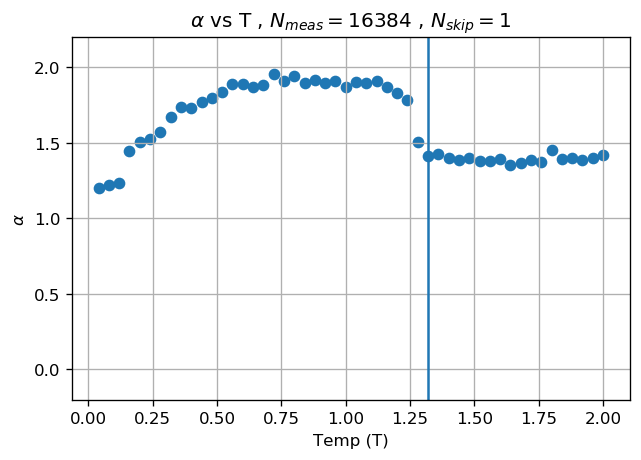

In [8]:
alpha_up = []
alpha_dn = []
yint = []
print(Tcrit)
# print(Omega[0,150])
# print(Omega[0,:])
# upper_cut_off = int(np.argwhere(Omega[1,:]//1 == int(upper)))
upper_cut_off = int(np.argwhere(np.around(Omega[0,:]) == int(upper)))
lower_cut_off = int(np.argwhere(np.around(Omega[0,:]) == int(lower)))
# lower_cut_off = int(np.argwhere(Omega[1,:]//1 == int(lower)))
# lower_cut_off = 1
for i in range(nn):
    if T_up[i] <= Tcrit:
#         upper_cut_off = int(upper)
#         lower_cut_off = int(lower)
        lg_Omega = np.log(Omega[i,lower_cut_off:upper_cut_off])
        lg_PSD = np.log(PSD_av[i,lower_cut_off:upper_cut_off])
        p = np.polyfit(lg_Omega, lg_PSD, deg = 1)
#     slope, intercept, r_value, p_value, std_err = stats.linregress(lg_Omega, lg_PSD)
#     alpha_up.append(-slope)
#         alpha_up.append(-p[0])
    else: 
#         upper_cut_off = int(upper)
#         lower_cut_off = int(lower)
        lg_Omega = np.log(Omega[i,lower_cut_off:upper_cut_off])
        lg_PSD = np.log(PSD_av[i,lower_cut_off:upper_cut_off])
        p = np.polyfit(lg_Omega, lg_PSD, deg = 1)
#     slope, intercept, r_value, p_value, std_err = stats.linregress(lg_Omega, lg_PSD)
#     alpha_up.append(-slope)
#         alpha_up.append(-p[0])
    alpha_up.append(-p[0])
    yint.append(p[1])
    
# cutofffreq = window_length//2
# for i in range(nn):
#     lg_Omega = np.log(Omega[i,1:])
#     lg_PSD = np.log(PSD[i,1:])
#     p = np.polyfit(lg_Omega, lg_PSD, deg = 1)
# #     slope, intercept, r_value, p_value, std_err = stats.linregress(lg_Omega, lg_PSD)
# #     alpha_up.append(-slope)
#     alpha_up.append(-p[0])

alpha_up = np.array(alpha_up)
alpha_dn = np.array(alpha_dn)
yint = np.array(yint)
# print(alpha_up)
# print("Maximum alpha " , np.max(alpha_up))
# print("Alpha at chosen critical point :", alpha_up[k2] )
# print(Vt_up[int(np.argmax(alpha_up))])

# print(np.shape(alpha_up), np.shape(alpha_dn))
# np.savetxt(path + "A_m1_02.dat", alpha_up)


# plt.plot(E_up,alpha_up,label="Up")
plt.scatter(T_up[0:nn],alpha_up,label="Up")
# plt.scatter(T_up[0:nn],Alldata[0:nn,1])
# plt.scatter(E_dn_py,alpha_dn, c = "RoyalBlue", label="Down")
plt.title(r'$\alpha$ vs T , $N_{meas} = 16384$ , $N_{skip} = 1$')
# plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
# np.savetxt(path+"alpha_n16.dat", alpha_up)
# plt.xlim(20.0,30.0)
plt.ylim(-0.2,2.2)
plt.axvline(x=Tcrit)
plt.xlabel(r'Temp (T)')
plt.ylabel(r'$\alpha$')
plt.grid(b=True,which='major', axis='both')
# plt.savefig(path+"alpvf_ns1.pdf")
plt.show()
    





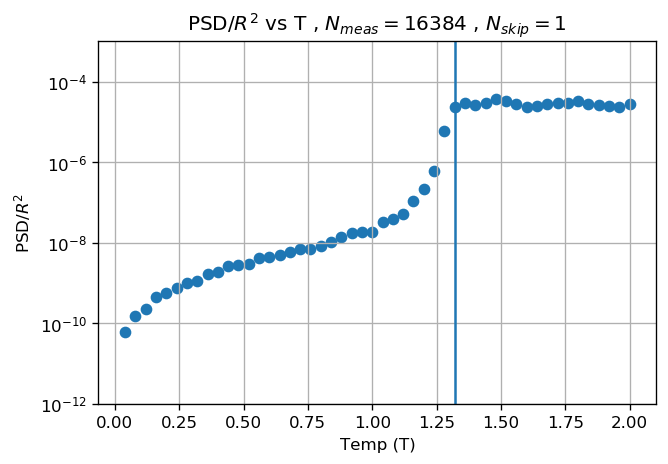

In [9]:
# print(Omega[0,:])
PSD_snap = PSD_av[:,Omega[0,:] == 12.6953125] 
# print(PSD_snap.reshape(nn))
plt.scatter(T_up[0:nn],PSD_snap)
plt.yscale('log')
plt.axvline(x=Tcrit)
plt.ylim(1.0E-12,1.0E-3)
# plt.xlim(0.6,1.5)
plt.ylabel("PSD/$R^2$")
plt.xlabel(r'Temp (T)')
plt.grid(b=True,which='major', axis='both')
plt.title(r'PSD/$R^2$ vs T , $N_{meas} = 16384$ , $N_{skip} = 1$')
# plt.savefig(path + "PSDvT.pdf")
plt.show()

In [10]:
# #### Folowing lines helps in isolating cases for Each temperature 
print("Temperature Values : ", T_up)
k1 = int(np.argwhere((T_up*10.) == 3.2))  #### ----> 0.24Tc
k2 = int(np.argwhere((T_up*10.) == 8.0)) #### ----> 0.75Tc
k3 = int(np.argwhere((T_up*10.) == 12.0)) #### ----> 0.9Tc 
k4 = int(np.argwhere((T_up*10.) == 12.8)) #### ----> 0.97Tc
k5 = int(np.argwhere((T_up*10.) == 20.0)) #### ----> 1.2Tc
print(k1,k2,k3,k4,k5)
karr = np.array([k1,k2,k3,k4,k5])
tempval = np.array([0.25,0.5,0.9,0.95,1.14])

Temperature Values :  [0.04 0.08 0.12 0.16 0.2  0.24 0.28 0.32 0.36 0.4  0.44 0.48 0.52 0.56
 0.6  0.64 0.68 0.72 0.76 0.8  0.84 0.88 0.92 0.96 1.   1.04 1.08 1.12
 1.16 1.2  1.24 1.28 1.32 1.36 1.4  1.44 1.48 1.52 1.56 1.6  1.64 1.68
 1.72 1.76 1.8  1.84 1.88 1.92 1.96 2.  ]
7 19 29 31 49


Text(0.5, 1.0, 'Noise time series, $N_{skip} = 1$')

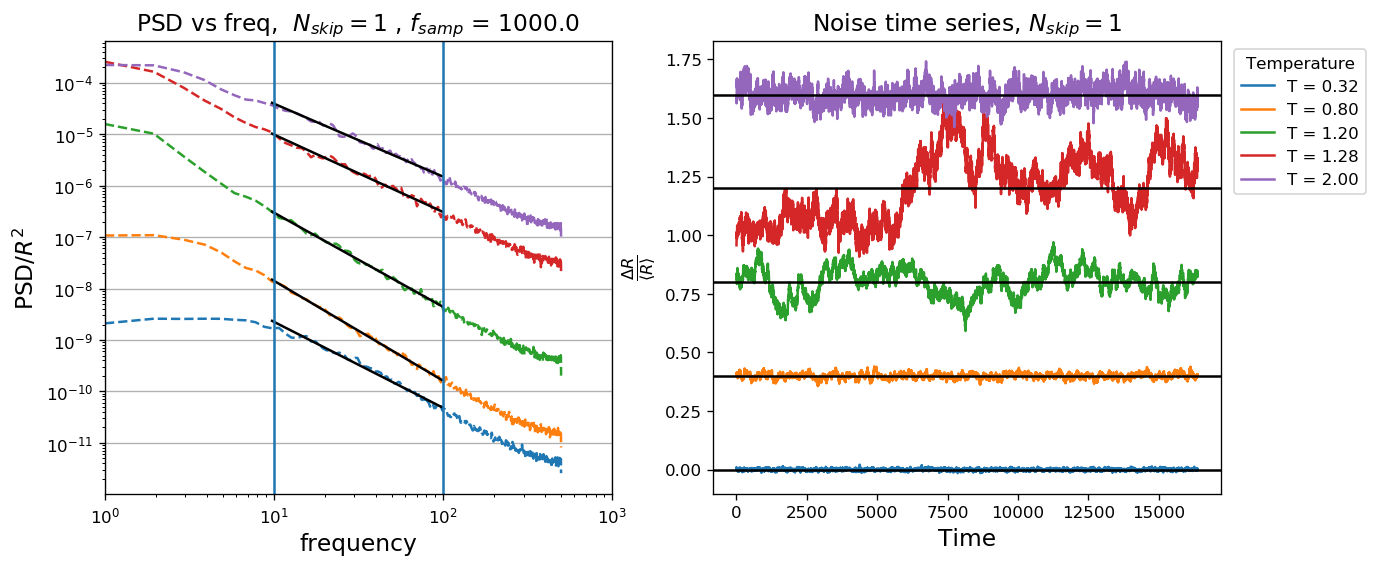

In [11]:
def ff(xx,a,b):
    return (1/xx**a)*np.exp(b)


f = plt.figure(figsize=(12, 5)); # plot the calculated values    

sp =  f.add_subplot(1, 2, 1 );
for kk in karr:
#     kk = kkk-1
    plt.loglog(Omega[kk,:], PSD_av[kk,:], linestyle = "dashed" )#, label = "T = " + format(T_up[kk], '.2f') 
    plt.loglog(Omega[kk,lower_cut_off:upper_cut_off],ff(Omega[kk,lower_cut_off:upper_cut_off],alpha_up[kk],yint[kk]), color = 'black')
#     np.savetxt(path + "PSD_"+format(T_up[kk]/Tcrit, '.2f') + "Tc.dat", PSD_av[kk,:] )
    
    
plt.title("PSD vs freq,  $N_{skip} = 1$ , $f_{samp}$ = "+ format(fs, '.1f'), fontsize = 14 )
plt.ylabel("PSD/$R^2$", fontsize = 14)
plt.xlabel("frequency", fontsize = 14)
plt.xlim(1,1000)
# # plt.legend()
plt.axvline(x=lower)
plt.axvline(x=upper)
# plt.ylim(1.0E-9,1.0E-2)
# plt.savefig(path+"PSDvf.pdf")
plt.grid(b=True,which='major', axis='both')
# plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()
l=0
sp =  f.add_subplot(1, 2, 2 );
for kk in karr:
#     kk = kkk-1
#     plt.plot(Tdata[kk,0,:], label = "T = " + format(T_up[kk], '.2f') )
    plt.plot(dRdata[kk,:]+l, label = "T = " + format(T_up[kk], '.2f') )
    plt.axhline(y=l, color = 'black')
    l+=0.4
    
    
plt.xlabel("Time", fontsize = 14)
plt.ylabel(r'$\frac{\Delta R}{\langle R \rangle}$', fontsize = 14)
# plt.ylabel("R")
# plt.xlim(100,1200)
# plt.xlim(1200,1600)
# plt.xlim(2000,4000)
# plt.xlim(4500,5000)
plt.legend(title="Temperature", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.title(r'$\frac{\Delta R}{\langle R \rangle}$ vs t, $N_{skip} = 1$', fontsize = 14)
plt.title(r'Noise time series, $N_{skip} = 1$', fontsize = 14)
# # plt.savefig(path+"Rvt.pdf")
# plt.show()


# plt.savefig(path+"Case_cc_ns1.pdf",bbox_inches='tight')

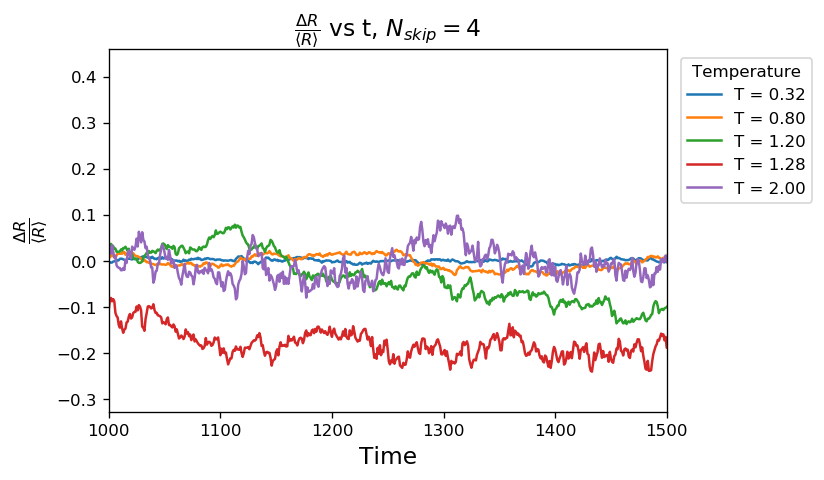

In [12]:
l = 0
for kk in karr:
#     plt.plot(Tdata[kk,0,:], label = "T = " + format(T_up[kk], '.2f') )
    plt.plot(dRdata[kk,:], label = "T = " + format(T_up[kk], '.2f') )
#     plt.axhline(y=l,color = 'black')
#     l += 0.1
    
    
plt.xlabel("Time", fontsize = 14)
plt.ylabel(r'$\frac{\Delta R}{\langle R \rangle}$', fontsize = 14)
# plt.ylabel("R")
plt.xlim(1000,1500)
plt.legend(title="Temperature", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.title(r'$\frac{\Delta R}{\langle R \rangle}$ vs t, $N_{skip} = 4$', fontsize = 14)
# plt.title(r'R vs t, $N_{skip} = 4$', fontsize = 14)
# plt.savefig(path+"dRvt.pdf",bbox_inches='tight')
plt.show()

In [13]:
# np.savetxt(path + "freq_val.dat",Omega[0,:])

In [14]:
# # NP = 1
# # NP = 2
# NP = 4
# # NP = 8
# # NP = 16

# # nmeas = 32768
# # nmeas = 16384
# nmeas = 8192
# # nmeas = 4096
# # nmeas = 2048
# # nmeas = 1024

# kk = 0

# Tdata = []
# PSD2 = []
# Omega = []
# dRdata = []
# fs = 1000.

# beta = 10.0
# window_length = 1024
# numoverlap = window_length/2.
# kaiserw = signal.get_window(('kaiser', beta), window_length) # Kaiser window
# # boxcarw = signal.boxcar(window_length)

# for i in range(nn):
#     tdata = np.loadtxt(path + "t_data_" + str(i) + ".dat")
#     tdata = tdata.reshape((NP,nmeas))
# #     NP = nP//4
# #     tdata = tdata[0:NP,:]
#     R0 = np.mean(tdata,axis=1)
#     R0 = R0.reshape((NP,1))
#     R0 = np.dot(R0,np.ones((1,nmeas)))
# #     print(R0)
#     delR = tdata - R0
# #     fval, R_ps = np.absolute(signal.welch((delR/R0), fs)
# #     fval, R_ps = np.absolute(signal.welch((delR/R0), fs, nperseg = window_length, window=kaiserw, noverlap = numoverlap, scaling = 'spectrum')) ## PSD using welch method
# #     fval, R_ps = np.absolute(signal.welch((delR/R0), fs, nperseg = window_length, window=boxcarw, noverlap = numoverlap)) ## PSD using welch method
#     R_ps = np.abs(np.fft.rfft(delR/R0))
#     fval = np.fft.fftfreq(nmeas//2 +1, d=1/fs)
#     R_ps = np.fft.fftshift(R_ps)
#     fval = np.fft.fftshift(fval)
#     Tdata.append(tdata)
#     dRdata.append(delR[kk,:]/R0[kk,:])
#     PSD2.append(R_ps)
#     Omega.append(fval)
# #     plt.plot(delR[kk,:]/R0[kk,:] , label = "Vt = " + format(T_up[i], '.2f') )
# #     if Vt_up[i] > 650. and Vt_up[i] < 850.0:
#     plt.plot(tdata[kk,:], label = "Vt = " + format(T_up[i], '.2f') )


    
# Tdata = np.array(Tdata)
# PSD2 = np.array(PSD2)
# Omega = np.array(Omega)
# dRdata = np.array(dRdata)
# print(np.shape(Tdata) , np.shape(PSD2) , np.shape(Omega) ,np.shape(dRdata))
# plt.xlabel("Time")
# # plt.ylabel(r'$\frac{\Delta R}{\langle R \rangle}$', fontsize = 16)
# plt.ylabel("R")
# # # plt.ylim(0,10)
# # plt.xlim(2400,2500)
# # plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
# # plt.title("R vs t, $N_{skip} = 4$ , $m_x = m_y = 64$  ")
# # plt.savefig(path+"Rvt.pdf")
# plt.show()

In [15]:
# # print(Omega[1,:])
# PSD_av = np.mean(PSD2,axis=1)
# print(np.shape(PSD2) , np.shape(PSD_av))
# upper = 100.
# lower = 8.
# for i in range(nn):
#     PSD_av[i,:] = PSD_av[i,:]/Alldata[i,7]**2

# for i in range(nn):
# #     if T_up[i] <= Tcrit:
# #         plt.loglog(Omega[i,:], PSD_av[i,:], label = "T = " + format(T_up[i], '.3f'))#,linestyle='dashed' )
# #     else :    
# #         plt.loglog(Omega[i,:], PSD_av[i,:], label = "T = " + format(T_up[i], '.3f'),linestyle='dashed' )    

#     plt.loglog(Omega[i,:], PSD_av[i,:])
# # print(PSD_av[59,:])    
# # plt.plot(Omega[2,1:-1], PSD_av[2,1:-1],label = "T = " + format(T_up[2], '.3f'))     
# # plt.plot(Omega[59,1:-1], PSD_av[59,1:-1], label = "T = " + format(T_up[59], '.3f'))
    
# PSD_snap = PSD_av[:,Omega[0,:] == 100.5859375] 
# plt.title("PSD vs freq (Eq), $f_{samp}$ ="+ format(fs, '.1f') + ", $N_{skip} = 1$  ")
# plt.ylabel("PSD/$R^2$")
# plt.xlabel("frequency")
# # plt.xlim(1,1000)
# # plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
# # plt.axvline(x=lower)
# # plt.axvline(x=upper)
# plt.ylim(1.0E-7,1.0E3)
# plt.xscale('log')
# plt.yscale('log')
# # plt.xlim(0.1,1)
# plt.grid(b=True,which='major', axis='both')
# # plt.legend()
# # plt.savefig(path+"PSDvf_ns4_2.pdf")
# plt.show()

In [16]:
t = np.arange(0.04,1.64,0.04)
t2 = np.arange(1.6,0.0,-0.04)
print(t)
print(t2)

[0.04 0.08 0.12 0.16 0.2  0.24 0.28 0.32 0.36 0.4  0.44 0.48 0.52 0.56
 0.6  0.64 0.68 0.72 0.76 0.8  0.84 0.88 0.92 0.96 1.   1.04 1.08 1.12
 1.16 1.2  1.24 1.28 1.32 1.36 1.4  1.44 1.48 1.52 1.56 1.6 ]
[1.6  1.56 1.52 1.48 1.44 1.4  1.36 1.32 1.28 1.24 1.2  1.16 1.12 1.08
 1.04 1.   0.96 0.92 0.88 0.84 0.8  0.76 0.72 0.68 0.64 0.6  0.56 0.52
 0.48 0.44 0.4  0.36 0.32 0.28 0.24 0.2  0.16 0.12 0.08 0.04]
